In [84]:
# libraries used

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import plotly as py
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics

In [4]:
#data import
data = pd.read_csv('loan prediction.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [16]:
train_df = data.drop(columns=['Loan_ID'])
train_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<AxesSubplot:xlabel='Gender', ylabel='count'>

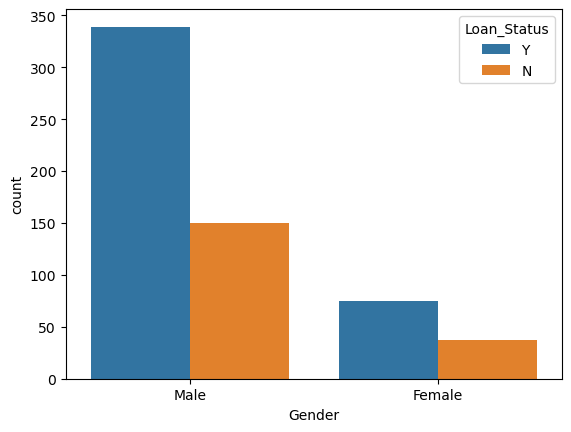

In [18]:
#Visualization of various relationships between variables
sns.countplot(x='Gender', data=train_df, hue='Loan_Status')

<AxesSubplot:xlabel='Married', ylabel='count'>

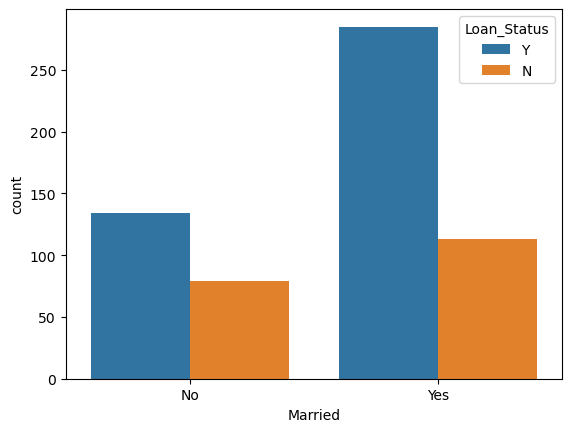

In [20]:
sns.countplot(x='Married', data=train_df, hue='Loan_Status')

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

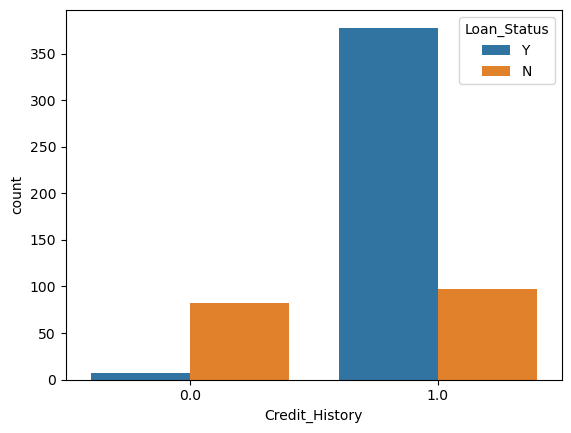

In [22]:
sns.countplot(x='Credit_History', data=train_df, hue='Loan_Status')

<AxesSubplot:xlabel='Dependents', ylabel='count'>

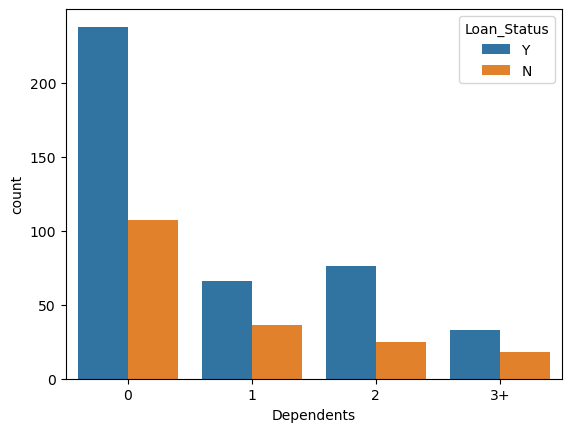

In [24]:
sns.countplot(x='Dependents', data=train_df, hue='Loan_Status')

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

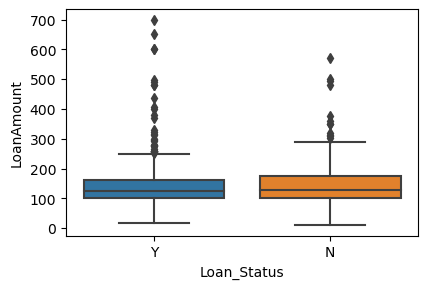

In [28]:
plt.figure(figsize=(10,10))
plt.subplot(3,2,6)
sns.boxplot(x='Loan_Status',y='LoanAmount',data=train_df)

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

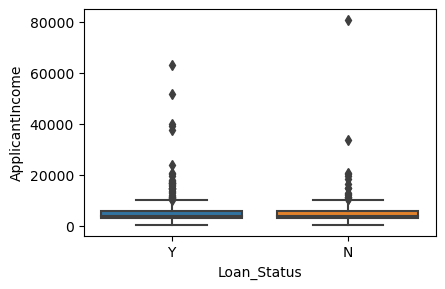

In [30]:
plt.figure(figsize=(10,10))
plt.subplot(3,2,6)
sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=train_df)

In [38]:
#replacing Null data

train_df['Credit_History']=train_df['Credit_History'].fillna(train_df['Credit_History'].mean())
train_df['Loan_Amount_Term']=train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mean())
train_df['LoanAmount']=train_df['LoanAmount'].fillna(train_df['LoanAmount'].mean())
train_df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [36]:
#Encoding categrical Features
train_df_encoded = pd.get_dummies(train_df,drop_first=True)
train_df_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [39]:
train_df_encoded.isna().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status_Y              0
dtype: int64

In [41]:
train_df_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [43]:
train_df_encoded.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014477,0.013933,0.050194,0.040861,-0.034650,0.156687,-0.140760,0.127180,-0.014246,-0.000598,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.082316,0.080496,-0.029769,0.010016,0.041491,-0.062290,-0.016100,-0.027044,0.022776,-0.059187
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007738,0.064609,0.145643,0.062359,0.019547,0.153200,-0.166998,0.115260,-0.008273,-0.033220,-0.036416
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.070179,-0.103400,-0.086946,-0.007786,-0.077071,-0.077242,-0.033943,0.061365,-0.096683,-0.020974
Credit_History,-0.014477,-0.001665,-0.007738,0.001395,1.000000,0.025103,0.001212,0.002531,0.012462,-0.057859,-0.077936,-0.002260,0.040757,-0.022621,0.540483
Gender_Male,0.013933,0.082316,0.064609,-0.070179,0.025103,1.000000,0.339026,0.008319,0.126145,0.064234,0.061497,-0.027421,-0.113069,0.044109,0.025407
Married_Yes,0.050194,0.080496,0.145643,-0.103400,0.001212,0.339026,1.000000,0.118052,0.253280,0.135217,0.017671,0.008491,-0.000229,0.000449,0.084281
Dependents_1,0.040861,-0.029769,0.062359,-0.086946,0.002531,0.008319,0.118052,1.000000,-0.198046,-0.134337,-0.013355,0.082044,0.011661,0.069320,-0.038740
Dependents_2,-0.034650,0.010016,0.019547,-0.007786,0.012462,0.126145,0.253280,-0.198046,1.000000,-0.133547,0.020822,0.032434,-0.012017,0.016569,0.062384
Dependents_3+,0.156687,0.041491,0.153200,-0.077071,-0.057859,0.064234,0.135217,-0.134337,-0.133547,1.000000,0.055288,0.003278,0.007863,-0.047460,-0.026123


<AxesSubplot:>

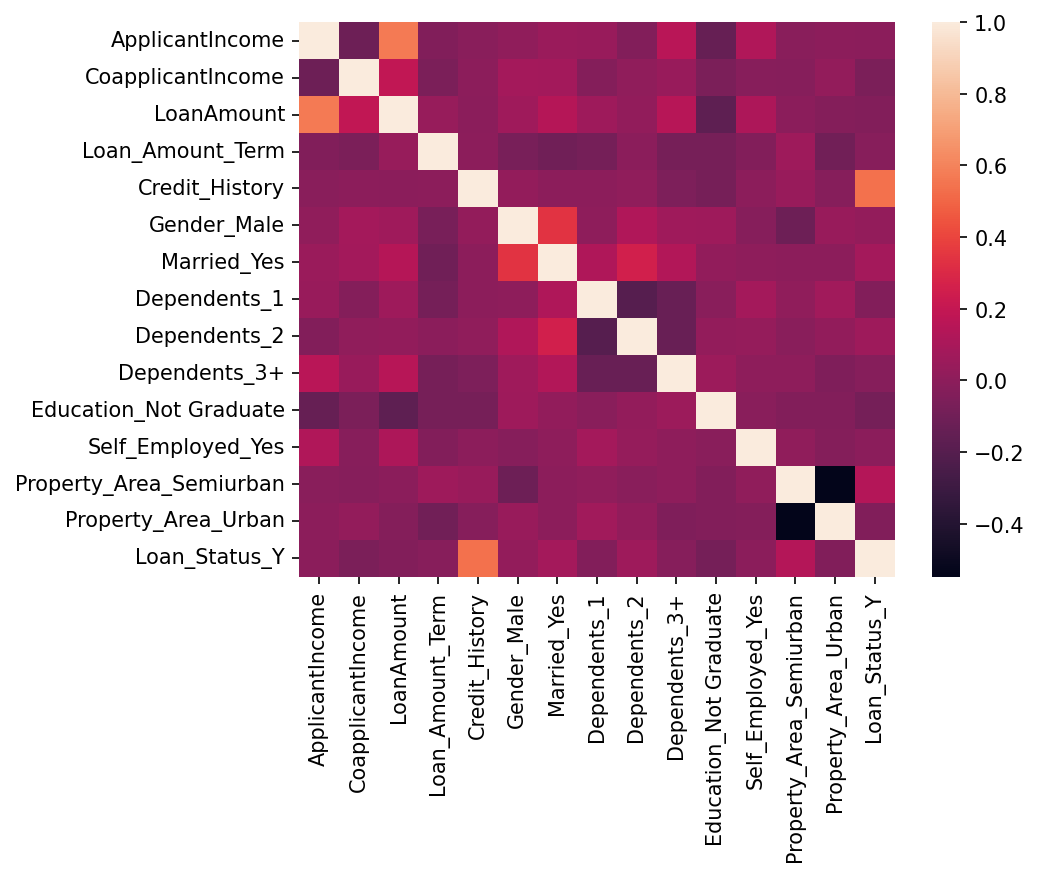

In [45]:
plt.figure(dpi=150)
sns.heatmap(train_df_encoded.corr(),annot = False)

In [50]:
#Split Features and Target Varible
X = train_df_encoded.drop(columns='Loan_Status_Y')
Y = train_df_encoded['Loan_Status_Y']


In [53]:
#Splitting into Train -Test Data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = .3, random_state = 38, stratify = y)

In [55]:
print(x_train)
print(y_train)

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
203             3500             1083.0  135.000000             360.0   
20              7660                0.0  104.000000             360.0   
551             2492             2375.0  146.412162             360.0   
309             7667                0.0  185.000000             360.0   
331             2935                0.0   98.000000             360.0   
..               ...                ...         ...               ...   
80              3846                0.0  111.000000             360.0   
32              4692                0.0  106.000000             360.0   
468              210             2917.0   98.000000             360.0   
247             6608                0.0  137.000000             180.0   
521             2500                0.0   55.000000             360.0   

     Credit_History  Gender_Male  Married_Yes  Dependents_1  Dependents_2  \
203        1.000000            1            1 

In [63]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(x_train)

X_test_scaled = scaler.fit_transform(x_test)

In [67]:
X_train_scaled


array([[5.30172346e-02, 2.59917921e-02, 1.72767204e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.18853562e-01, 0.00000000e+00, 1.27379209e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [3.70645861e-02, 5.69995440e-02, 1.89476079e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.49562410e-04, 7.00074399e-02, 1.18594436e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.02204567e-01, 0.00000000e+00, 1.75695461e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [3.71911944e-02, 0.00000000e+00, 5.56368960e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [70]:
X_test_scaled

array([[0.02469522, 0.        , 0.11704312, ..., 1.        , 0.        ,
        1.        ],
       [0.01294154, 0.06528357, 0.25667351, ..., 0.        , 1.        ,
        0.        ],
       [0.01590497, 0.04498035, 0.19507187, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.0764864 , 0.        , 0.26488706, ..., 1.        , 0.        ,
        0.        ],
       [0.04901532, 0.        , 0.2821605 , ..., 0.        , 0.        ,
        0.        ],
       [0.02415755, 0.        , 0.14784394, ..., 0.        , 1.        ,
        0.        ]])

In [72]:
#create model
logreg = LogisticRegression()


In [74]:
model = logreg.fit(X_train_scaled, y_train)

Y_pred = logreg.predict(X_test_scaled)

In [77]:
Y_pred

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=uint8)

In [88]:
#visualizing with confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test,Y_pred)
cnf_matrix

array([[ 20,  38],
       [  5, 122]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted')

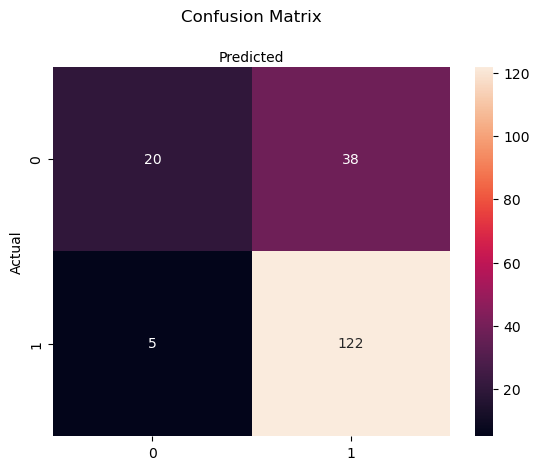

In [91]:
class_names = [0 , 1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True,fmt = 'g')
ax.xaxis.set_label_position('top')
plt.title("Confusion Matrix", y = 1.1)
plt.ylabel("Actual")
plt.xlabel("Predicted")

In [100]:
#checking model accuracy
print(classification_report(y_test, Y_pred,))

              precision    recall  f1-score   support

           0       0.80      0.34      0.48        58
           1       0.76      0.96      0.85       127

    accuracy                           0.77       185
   macro avg       0.78      0.65      0.67       185
weighted avg       0.77      0.77      0.73       185



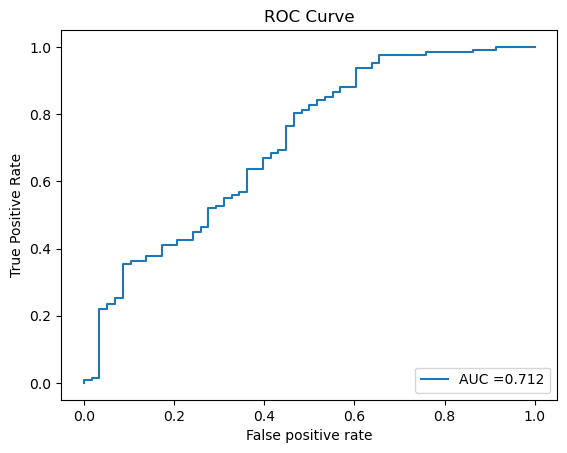

In [101]:
Y_pred = model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, Y_pred)
roc_auc = roc_auc_score(y_test,Y_pred)

plt.plot(fpr,tpr,label ="AUC ={:2.3f}".format(roc_auc))
plt.xlabel("False positive rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc= "lower right")